In [2]:
import os
import sys
#import hic
#import utilities
import pandas as pd
import numpy as np
import xarray as xr
#import plasma
#import plasma_interaction as pi
#import jets
#import config
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.interpolate as interpolate
import numpy.random as rn
from scipy import integrate
from scipy.interpolate import RegularGridInterpolator
from scipy.special import expi

import scipy.optimize as optimize
import fnmatch
# import lhapdf

%matplotlib inline
%config InlineBackend.figure_format='png'
import matplotlib.pyplot as plt
#plt.rcParams['font.family'] = 'Helvetica'

## Acoplanarity Selection Cuts

In [3]:

# direc = '2024.08.03_acoplanarities'
# filelist = os.listdir(direc)

# results = pd.DataFrame({})
# for file in filelist:
#     print(file)
#     currentfile = pd.read_parquet(direc + '\\' + file)
#     results = pd.concat([results, currentfile])


In [10]:
results = pd.read_parquet('2024.09.17\\acoplanarities_2024.09.17_full.parquet')

ArrowMemoryError: malloc of size 8388608 failed

In [ ]:
results

In [17]:
# #TeX up labels and text:

# plt.rc("text", usetex=True)
# plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
# plt.rc('font', size=24) 
# plt.rc('font', family='serif')

# #     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
# plt.rcParams["font.weight"] = "bold"     
# #     plt.rcParams["axes.labelweight"] = "bold"
# plt.rc('axes', linewidth=2)



<Axes: >

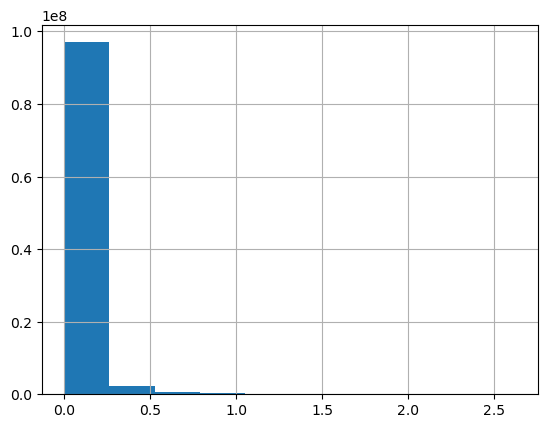

In [5]:
results['aco'].hist()

<Axes: >

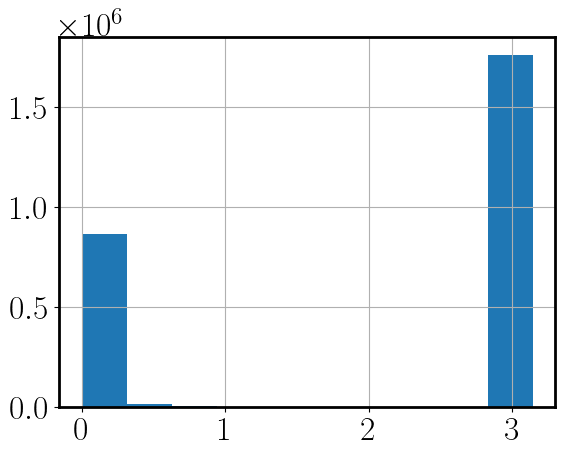

In [123]:
results['aco'].hist()

In [6]:
results['K_F_DRIFT'].value_counts()

0.75    33440836
1.25    33440836
1.00    33440836
Name: K_F_DRIFT, dtype: int64

<Axes: >

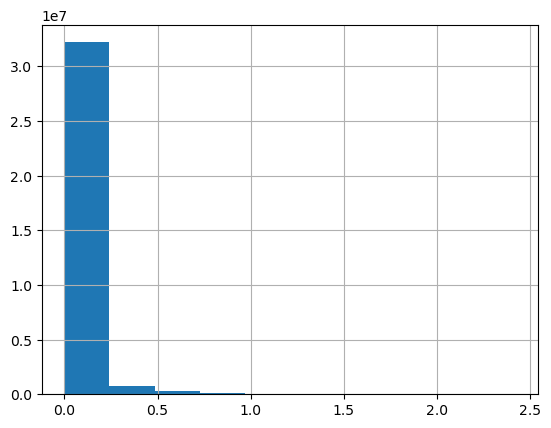

In [7]:
results[results['K_F_DRIFT'] == 1]['aco'].hist()

In [132]:
results.loc[(results['cent'] == '0-5') | (results['cent'] == '5-10'), :]['cent_10']

31746      0-10
31747      0-10
31748      0-10
31749      0-10
31750      0-10
           ... 
2574655    0-10
2574656    0-10
2574657    0-10
2574658    0-10
2574659    0-10
Name: cent_10, Length: 266178, dtype: object

In [133]:
results['cent_10'] = results['cent']
results.loc[(results['cent'] == '0-5') | (results['cent'] == '5-10'), 'cent_10'] = '0-10'

In [134]:
results[results['cent_10'] == '0-10']['cent_10']

31746      0-10
31747      0-10
31748      0-10
31749      0-10
31750      0-10
           ... 
2574655    0-10
2574656    0-10
2574657    0-10
2574658    0-10
2574659    0-10
Name: cent_10, Length: 266178, dtype: object

0-10% : b= 266178
10-20% : b= 270600
20-30% : b= 277200
30-40% : b= 250800
40-50% : b= 264000
50-60% : b= 270600
60-70% : b= 274032
70-80% : b= 237600
80-90% : b= 265056
90-100% : b= 264000


<BarContainer object of 10 artists>

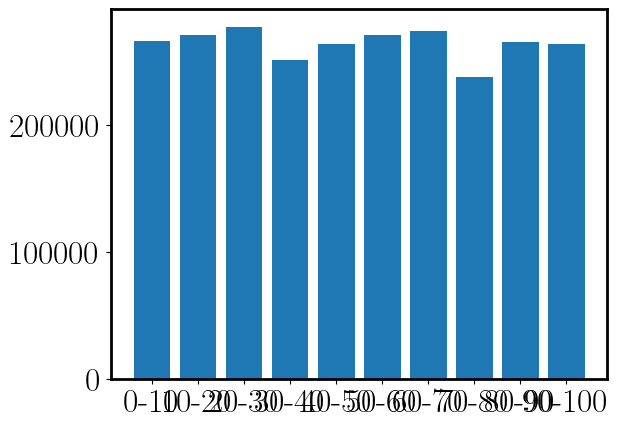

In [149]:
cent_labels = np.array(['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])
val_array = np.array([])
for cent_10 in cent_labels:
    df = results[results['cent_10'] == cent_10]
    val = len(df)
    val_array = np.append(val_array, val)
    # do stuff
    print('{}% : b= {}'.format(cent_10, val))

plt.bar(cent_labels, val_array)

Text(0, 0.5, 'Acoplanarity Enhancement (rad)')

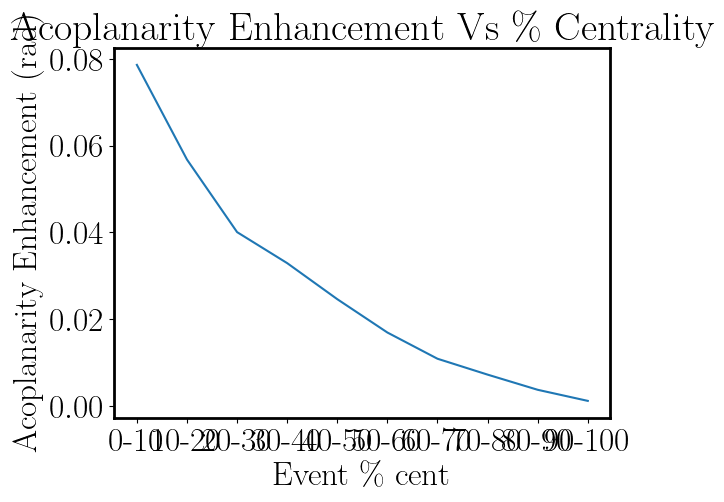

In [193]:
#Aco Vs %cent
cent_labels = np.array(['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])
val_array = np.array([])
for cent_10 in cent_labels:
    df = results[(results['cent_10'] == cent_10) & (results['K_F_DRIFT'] == 0.75)]
    val = np.average(df['aco']) #, weights=df['weight'])
    val_array = np.append(val_array, val)
    # do stuff
    #print('{}% : b= {}'.format(cent_10, val))

fig, axis = plt.subplots(1)
axis.plot(cent_labels, val_array)

axis.set_title(r'Acoplanarity Enhancement Vs $\%$ Centrality')
axis.set_xlabel('Event {}$\%$ cent')
axis.set_ylabel('Acoplanarity Enhancement (rad)')


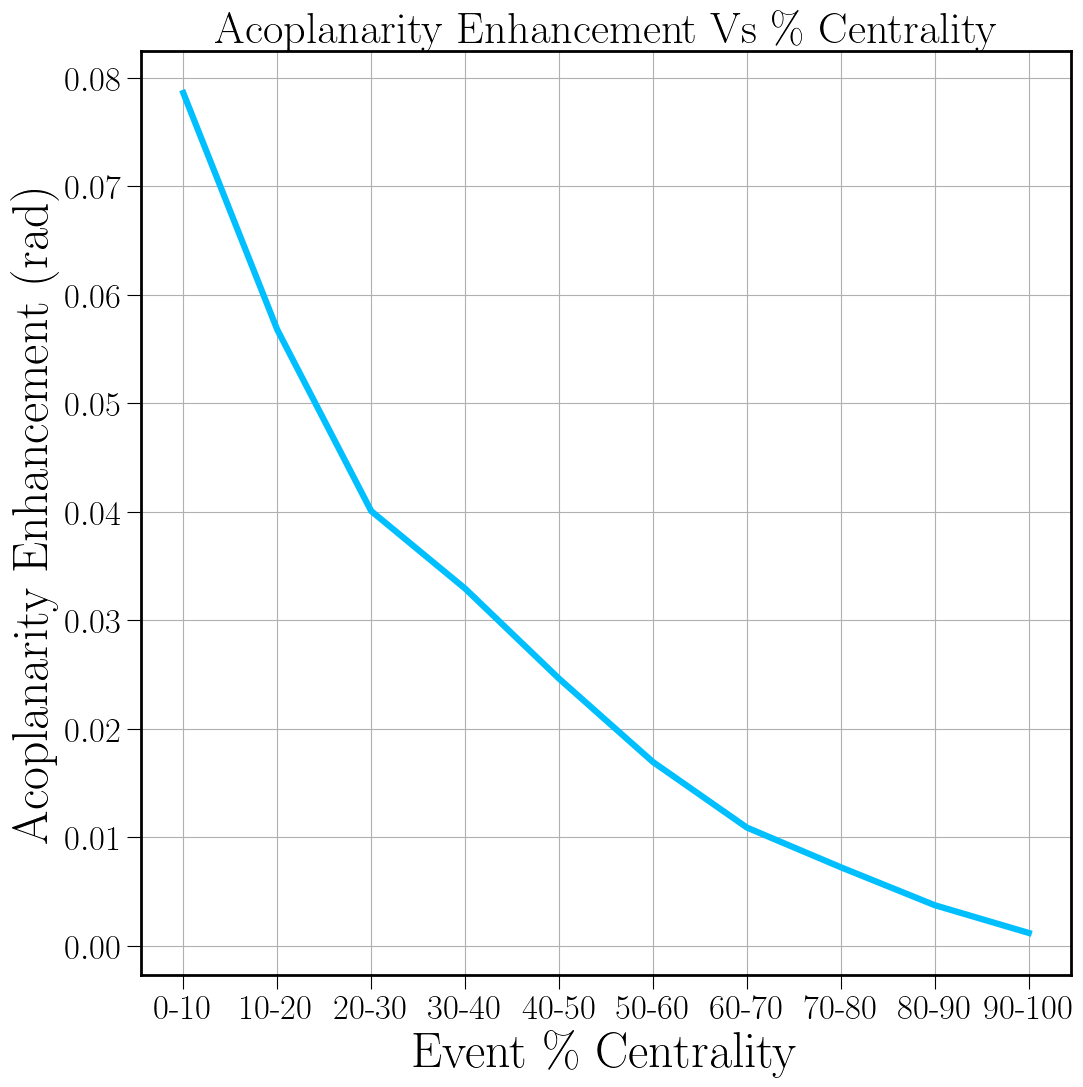

In [195]:
#Acoplanarity = func(%cent) Plot


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.set_title(r'Acoplanarity Enhancement Vs $\%$ Centrality', fontsize= 32)
ax.set_xlabel('Event $\%$ Centrality', fontsize= 36)
ax.set_ylabel('Acoplanarity Enhancement (rad)', fontsize= 36)

ax.plot(cent_labels, val_array, linewidth = 4.5, color='deepskyblue') #, label="$T = 0 - 1$ GeV"
# ax.plot(e2_bins, values6, linewidth = 4, color='b', ls= 'dotted', label="$T = 0 - 0.2$ GeV") #
# ax.plot(e2_bins, values7, linewidth = 4, color='orange', ls= 'dashdot', label="$T = 0.2 - 0.4$ GeV") #
# ax.plot(e2_bins, values8, linewidth = 4, color='magenta', ls= 'dashed', label="$T = 0.4 - 0.6$ GeV") #
# ax.plot(e2_bins, values9, linewidth = 4, color='r', ls= (0,(3,1,1,1)), label="$T = 0.6 - 1$ GeV") #

ax.tick_params(axis='both',which='major',labelsize=25,length=10)
# plt.ylim(0,0.08)
ax.grid()
# ax.legend(fontsize=24)
plt.savefig("aco_enh_unweighted_func_%cent_kdrift0.75.png", bbox_inches="tight")
# ax.set_xlim(0,500)
# print(T_bins, values)

Text(0, 0.5, 'Acoplanarity Enhancement (rad)')

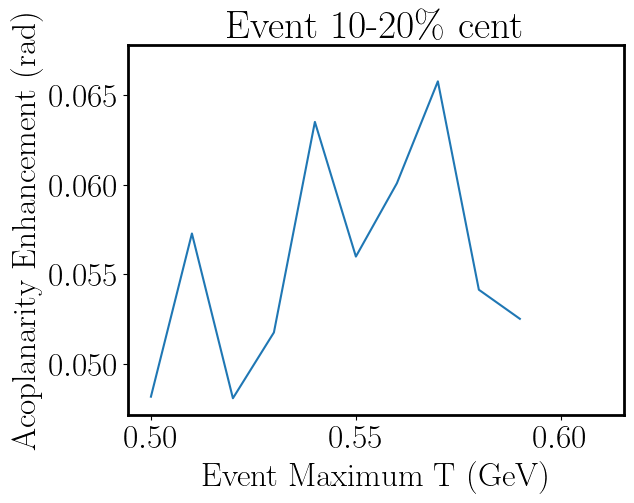

In [142]:
#Acoplanarities as a function of T
cent_bin = '10-20'

cent_cut = (results['cent_10'] == cent_bin) & (results['K_F_DRIFT'] == 0.75)
bin_width = 0.01
values = np.array([])
T_bins = np.arange(0, 1, bin_width)
for T in T_bins:
    T_cut = (results['Tmax_event'] < T + bin_width/2) & (results['Tmax_event'] > T - bin_width/2)
    # print("begin")
    val = np.mean(results[cent_cut & T_cut]['aco'])
    # print(results[e2_cut & T_cut]['aco'])
    # print("end")
    values = np.append(values, val)

fig, axis = plt.subplots(1)
axis.plot(T_bins, values)


# plt.ylim(0,0.035)
axis.set_title(r'Event {}$\%$ cent'.format(cent_bin))
axis.set_xlabel('Event Maximum T (GeV)')
axis.set_ylabel('Acoplanarity Enhancement (rad)')
# print(T_bins, values)

Text(0, 0.5, 'Acoplanarity Enhancement (rad)')

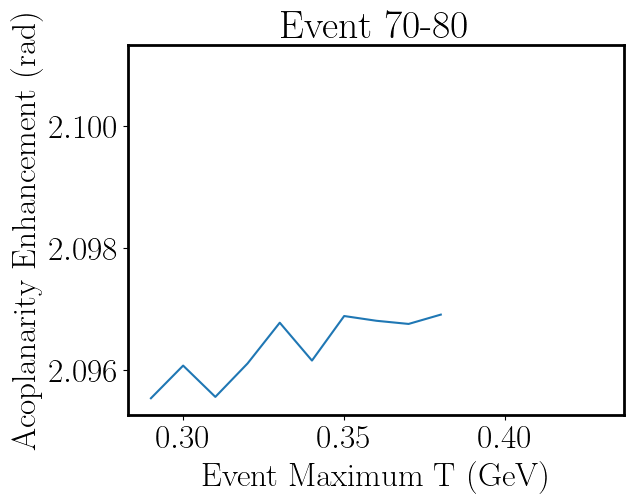

In [137]:
#Acoplanarities as a function of T
cent_bin = '70-80'

cent_cut = (results['cent_10'] == cent_bin)
bin_width = 0.01
values = np.array([])
T_bins = np.arange(0, 1, bin_width)
for T in T_bins:
    T_cut = (results['Tmax_event'] < T + bin_width/2) & (results['Tmax_event'] > T - bin_width/2)
    # print("begin")
    val = np.mean(results[cent_cut & T_cut]['aco'])
    # print(results[e2_cut & T_cut]['aco'])
    # print("end")
    values = np.append(values, val)

fig, axis = plt.subplots(1)
axis.plot(T_bins, values)


# plt.ylim(0,2.102)
axis.set_title(r'Event {} % cent'.format(cent_bin))
axis.set_xlabel('Event Maximum T (GeV)')
axis.set_ylabel('Acoplanarity Enhancement (rad)')
# print(T_bins, values)

0-5% : b= 2.842052172161111
5-10% : b= 4.9543891738516805
10-20% : b= 6.603376184329269
20-30% : b= 8.266333561135712
30-40% : b= 9.584250592807894
40-50% : b= 10.881303867649999
50-60% : b= 11.906789322080487
60-70% : b= 13.07373750857852
70-80% : b= 14.37925779451389
80-90% : b= 15.238026672430676
90-100% : b= 16.428049057567502


Text(0, 0.5, 'b')

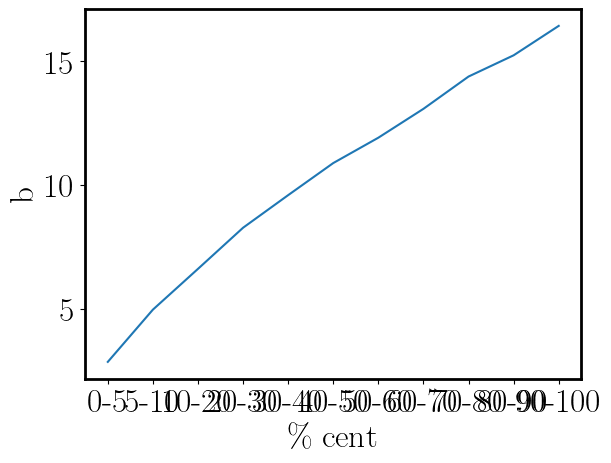

In [143]:
cent_labels = np.array(['0-5', '5-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])
val_array = np.array([])
for cent in cent_labels:
    df = results[results['cent'] == cent]
    val = np.mean(df['b'])
    val_array = np.append(val_array, val)
    # do stuff
    print('{}% : b= {}'.format(cent, val))

fig, axis = plt.subplots(1)
axis.plot(cent_labels, val_array)

# plt.plot(cent_labels, val_array)
# axis.set_title(r'Event {} % cent'.format(cent_bin))
axis.set_xlabel('$\%$ cent')
axis.set_ylabel('b')


In [105]:
results.to_parquet('2024.08.03_acoplanarities.parquet')

In [106]:
# results['old_aco'] = results['aco']
# results['aco'] = np.mod(results['aco'], np.pi)

Text(0, 0.5, 'dP/d(enh.)')

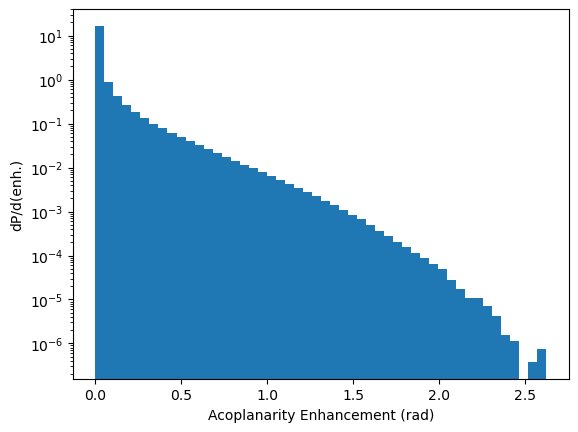

In [11]:
plt.hist(results['aco'], bins=50, density=True) #[results['K_F_DRIFT'] == 0.75] 
plt.yscale('log')
plt.xlabel(r'Acoplanarity Enhancement (rad)')
plt.ylabel(r'dP/d(enh.)')

Text(0, 0.5, '$dP/dT$')

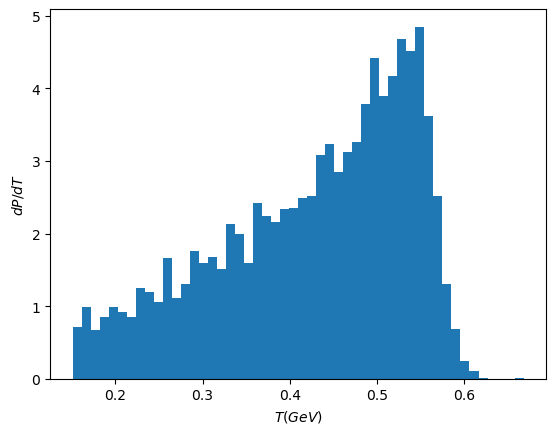

In [12]:
plt.hist(results['Tmax_event'], bins=50, density=True) #[results['K_F_DRIFT'] == 0.75]
plt.xlabel(r'$T (GeV)$')
plt.ylabel(r'$dP/dT$')

Text(0, 0.5, '$dP/d\\epsilon_2$')

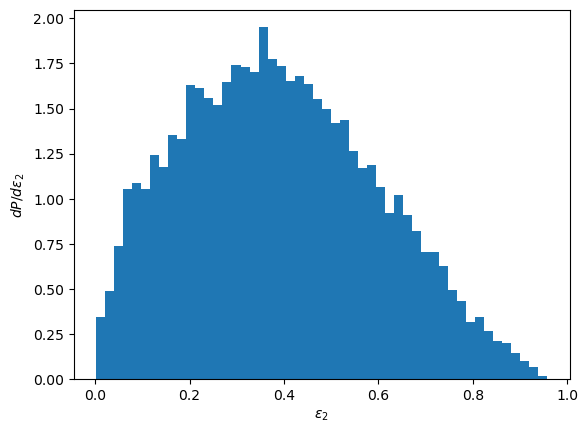

In [13]:

plt.hist(results['e2'], bins=50, density=True) #[results['K_F_DRIFT'] == 0.75]
plt.xlabel(r'$\epsilon_2$')
plt.ylabel(r'$dP/d\epsilon_2$')

Text(0, 0.5, '$dP/d\\%cent$')

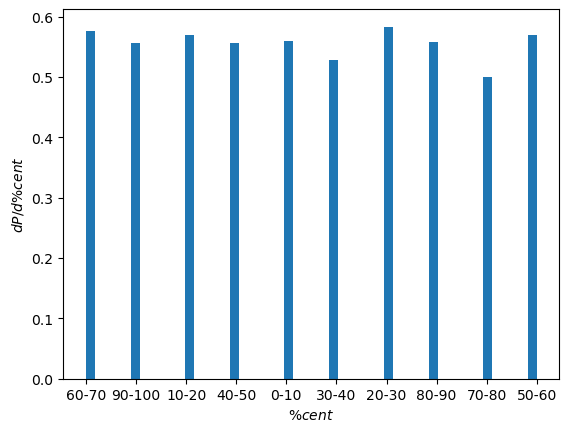

In [110]:
plt.hist(results['cent_10'], bins=50, density=True)
plt.xlabel(r'$\%cent$')
plt.ylabel(r'$dP/d\%cent$')

Text(0, 0.5, '$dP/dv_2^{soft}$')

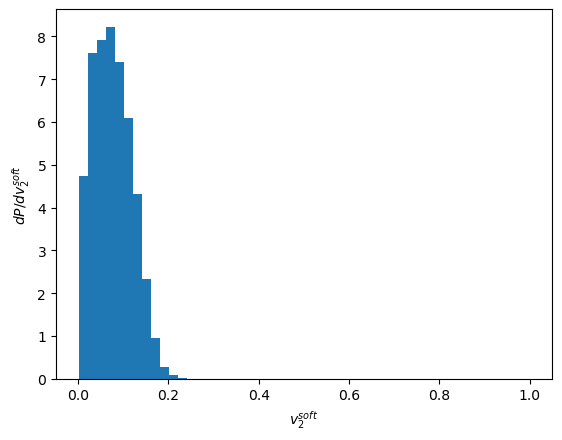

In [14]:
plt.hist(results['v2'], bins=50, density=True) #[results['K_F_DRIFT'] == 0.75]
plt.xlabel(r'$v_2^{soft}$')
plt.ylabel(r'$dP/dv_2^{soft}$')

Text(0, 0.5, '$dP/db$')

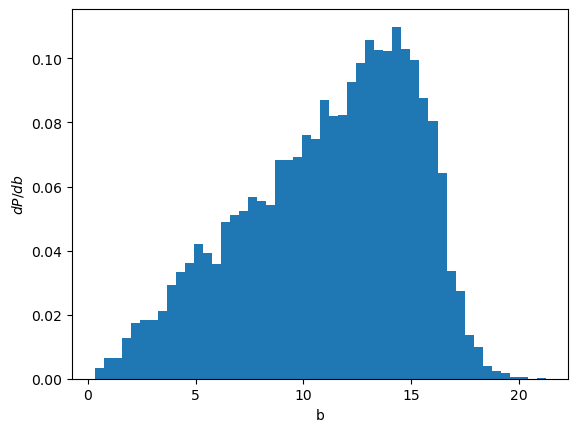

In [15]:
plt.hist(results['b'], bins=50, density=True) #[results['K_F_DRIFT'] == 0.75]
plt.xlabel(r'b')
plt.ylabel(r'$dP/db$')

Text(0, 0.5, 'Acoplanarity Enhancement (rad)')

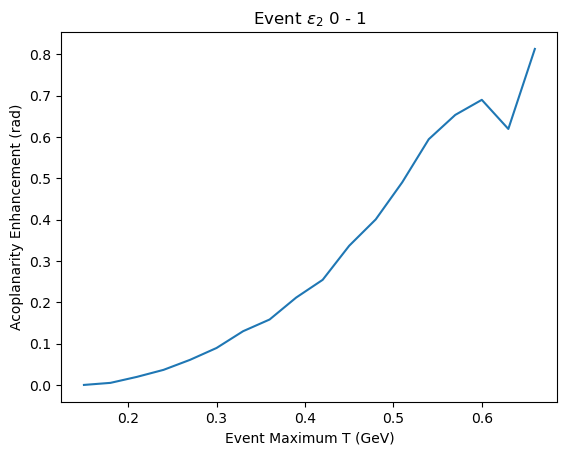

In [16]:
#Acoplanarities as a function of T (added Drift selection cut )
e_min = 0
e_max = 1

e2_cut = (results['e2'] < e_max) & (results['e2'] > e_min) #& (results['K_F_DRIFT'] == 0.75)
bin_width = 0.03
values0 = np.array([])
T_bins = np.arange(0, 1, bin_width)
for T in T_bins:
    T_cut = (results['Tmax_event'] < T + bin_width/2) & (results['Tmax_event'] > T - bin_width/2)
    # print("begin")
    try:
        val = np.average(results[e2_cut & T_cut]['aco'], weights=results[e2_cut & T_cut]['weight'])
    except:
        val = np.nan
    
    # val = np.mean(results[e2_cut & T_cut]['aco'])

    # print(results[e2_cut & T_cut]['aco'])
    # print("end")
    values0 = np.append(values0, val)

fig, axis = plt.subplots(1)
axis.plot(T_bins, values0)


#plt.ylim(0,0.085)
axis.set_title(r'Event $\epsilon_2$ {} - {}'.format(e_min, e_max))
axis.set_xlabel('Event Maximum T (GeV)')
axis.set_ylabel('Acoplanarity Enhancement (rad)')
# print(T_bins, values)

Text(0, 0.5, 'Acoplanarity Enhancement (rad)')

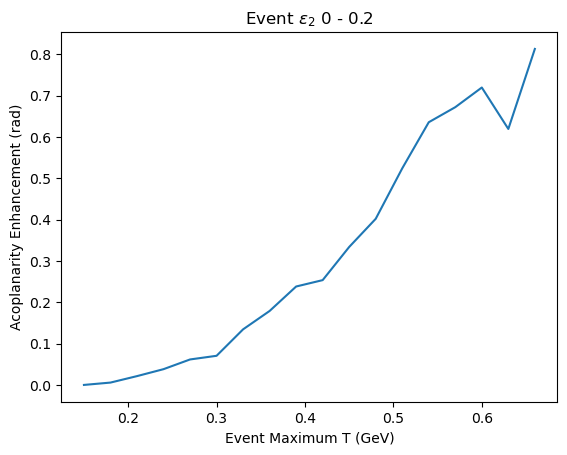

In [17]:
#Acoplanarities as a function of T (added Drift selection cut )
e_min = 0
e_max = 0.2

e2_cut = (results['e2'] < e_max) & (results['e2'] > e_min) # & (results['K_F_DRIFT'] == 0.75)
bin_width = 0.03
values1 = np.array([])
T_bins = np.arange(0, 1, bin_width)
for T in T_bins:
    T_cut = (results['Tmax_event'] < T + bin_width/2) & (results['Tmax_event'] > T - bin_width/2)
    # print("begin")
    try:
        val = np.average(results[e2_cut & T_cut]['aco'], weights=results[e2_cut & T_cut]['weight'])
    except:
        val = np.nan

    # val = np.mean(results[e2_cut & T_cut]['aco'])
    # print(results[e2_cut & T_cut]['aco'])
    # print("end")
    values1 = np.append(values1, val)

fig, axis = plt.subplots(1)
axis.plot(T_bins, values1)


# plt.ylim(0,0.085)
axis.set_title(r'Event $\epsilon_2$ {} - {}'.format(e_min, e_max))
axis.set_xlabel('Event Maximum T (GeV)')
axis.set_ylabel('Acoplanarity Enhancement (rad)')
# print(T_bins, values)

Text(0, 0.5, 'Acoplanarity Enhancement (rad)')

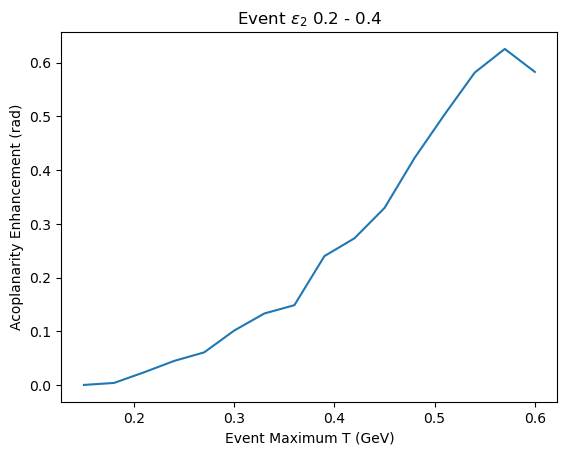

In [18]:
#Acoplanarities as a function of T (added Drift selection cut )
e_min = 0.2
e_max = 0.4

e2_cut = (results['e2'] < e_max) & (results['e2'] > e_min) #& (results['K_F_DRIFT'] == 0.75)
bin_width = 0.03
values2 = np.array([])
T_bins = np.arange(0, 1, bin_width)
for T in T_bins:
    T_cut = (results['Tmax_event'] < T + bin_width/2) & (results['Tmax_event'] > T - bin_width/2)
    # print("begin")
    try:
        val = np.average(results[e2_cut & T_cut]['aco'], weights=results[e2_cut & T_cut]['weight'])
    except:
        val = np.nan

    # val = np.mean(results[e2_cut & T_cut]['aco'])
    # print(results[e2_cut & T_cut]['aco'])
    # print("end")
    values2 = np.append(values2, val)

fig, axis = plt.subplots(1)
axis.plot(T_bins, values2)


# plt.ylim(0,0.085)
axis.set_title(r'Event $\epsilon_2$ {} - {}'.format(e_min, e_max))
axis.set_xlabel('Event Maximum T (GeV)')
axis.set_ylabel('Acoplanarity Enhancement (rad)')
# print(T_bins, values)

Text(0, 0.5, 'Acoplanarity Enhancement (rad)')

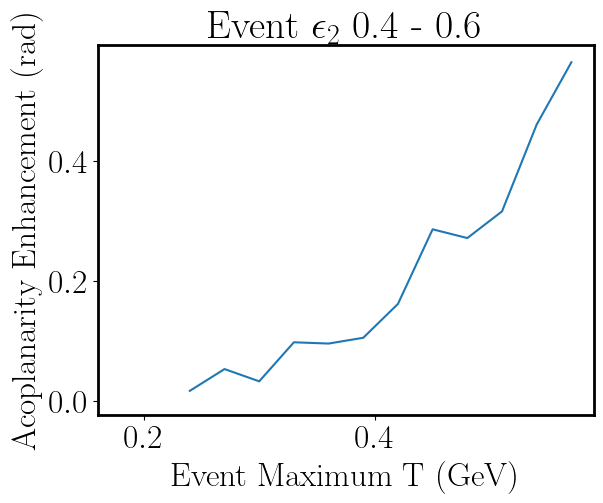

In [172]:
#Acoplanarities as a function of T (added Drift selection cut )
e_min = 0.4
e_max = 0.6

e2_cut = (results['e2'] < e_max) & (results['e2'] > e_min) & (results['K_F_DRIFT'] == 0.75)
bin_width = 0.03
values3 = np.array([])
T_bins = np.arange(0, 1, bin_width)
for T in T_bins:
    T_cut = (results['Tmax_event'] < T + bin_width/2) & (results['Tmax_event'] > T - bin_width/2)
    # print("begin")
    try:
        val = np.average(results[e2_cut & T_cut]['aco'], weights=results[e2_cut & T_cut]['weight'])
    except:
        val = np.nan

    # val = np.mean(results[e2_cut & T_cut]['aco'])
    # print(results[e2_cut & T_cut]['aco'])
    # print("end")
    values3 = np.append(values3, val)

fig, axis = plt.subplots(1)
axis.plot(T_bins, values3)


# plt.ylim(0,0.085)
axis.set_title(r'Event $\epsilon_2$ {} - {}'.format(e_min, e_max))
axis.set_xlabel('Event Maximum T (GeV)')
axis.set_ylabel('Acoplanarity Enhancement (rad)')
# print(T_bins, values)

[0.   0.03 0.06 0.09 0.12 0.15 0.18 0.21 0.24 0.27 0.3  0.33 0.36 0.39
 0.42 0.45 0.48 0.51 0.54 0.57 0.6  0.63 0.66 0.69 0.72 0.75 0.78 0.81
 0.84 0.87 0.9  0.93 0.96 0.99] [       nan        nan        nan        nan        nan        nan
 0.00118971        nan 0.00951334 0.00957863 0.07616353 0.06877367
 0.12813634 0.15296785 0.11704762 0.35605326 0.25748877 0.221072
 0.32152102        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan]


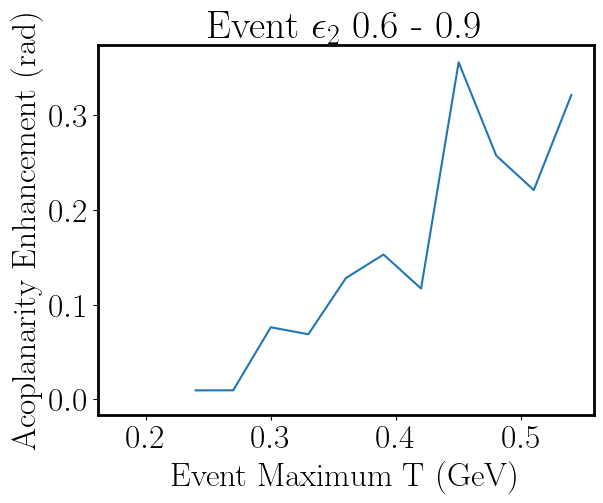

In [173]:
#Acoplanarities as a function of T (added Drift selection cut )
e_min = 0.6
e_max = 0.9

e2_cut = (results['e2'] < e_max) & (results['e2'] > e_min) & (results['K_F_DRIFT'] == 0.75)
bin_width = 0.03
values4 = np.array([])
T_bins = np.arange(0, 1, bin_width)
for T in T_bins:
    T_cut = (results['Tmax_event'] < T + bin_width/2) & (results['Tmax_event'] > T - bin_width/2)
    # print("begin")
    try:
        val = np.average(results[e2_cut & T_cut]['aco'], weights=results[e2_cut & T_cut]['weight'])
    except:
        val = np.nan
    # print(results[e2_cut & T_cut]['aco']) #mean
    # print("end")
    values4 = np.append(values4, val)

fig, axis = plt.subplots(1)
axis.plot(T_bins, values4)


#plt.ylim(0,0.085)
axis.set_title(r'Event $\epsilon_2$ {} - {}'.format(e_min, e_max))
axis.set_xlabel('Event Maximum T (GeV)')
axis.set_ylabel('Acoplanarity Enhancement (rad)')
print(T_bins, values4)

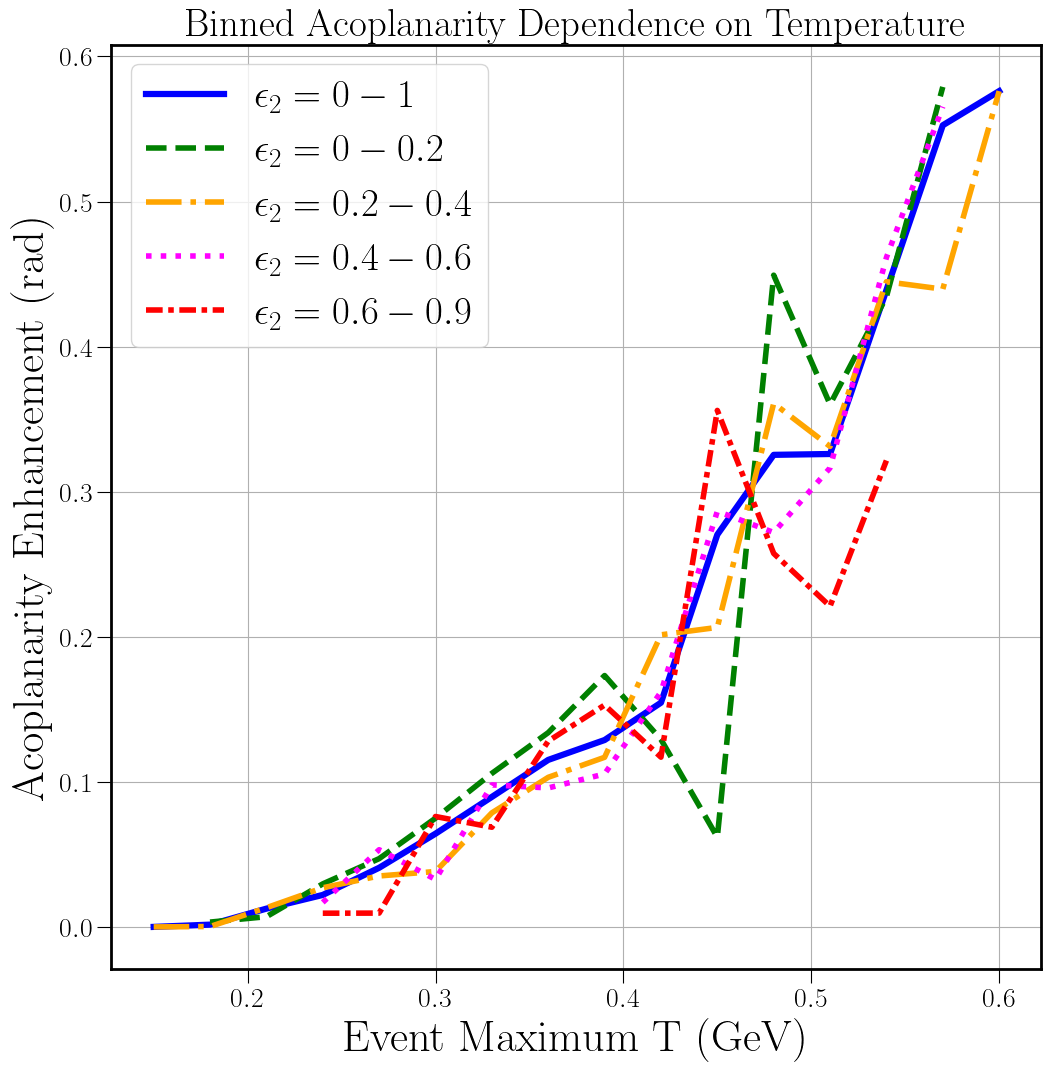

In [174]:
#Acoplanarity = func(T) Plot


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)



ax.set_title(r'Binned Acoplanarity Dependence on Temperature', fontsize= 28)
ax.set_xlabel('Event Maximum T (GeV)', fontsize= 32)
ax.set_ylabel('Acoplanarity Enhancement (rad)', fontsize= 32)

ax.plot(T_bins, values0, linewidth = 4.5, color='b', label="$\epsilon_2 = 0 - 1$") #
ax.plot(T_bins, values1, linewidth = 4, color='g', ls= 'dashed', label="$\epsilon_2 = 0 - 0.2$") #
ax.plot(T_bins, values2, linewidth = 4, color='orange', ls= 'dashdot', label="$\epsilon_2 = 0.2 - 0.4$") #
ax.plot(T_bins, values3, linewidth = 4, color='magenta', ls= 'dotted', label="$\epsilon_2 = 0.4 - 0.6$") #
ax.plot(T_bins, values4, linewidth = 4, color='r', ls= (0,(3,1,1,1)), label="$\epsilon_2 = 0.6 - 0.9$") #

ax.tick_params(axis='both',which='major',labelsize=20,length=10)
# plt.ylim(0,0.09)
ax.grid()
ax.legend(fontsize=28)
plt.savefig("aco_enh_weighted_funcT_ecc2_all_kdrift0.75.png", bbox_inches="tight")
# ax.set_xlim(0,500)
# print(T_bins, values)

[0.   0.06 0.12 0.18 0.24 0.3  0.36 0.42 0.48 0.54 0.6  0.66 0.72 0.78
 0.84 0.9  0.96] [0.0603632  0.05377346 0.05096715 0.04199531 0.0338202  0.03680117
 0.027189   0.02436107 0.01942766 0.01562988 0.01010155 0.01284225
 0.0084348  0.00634192 0.00367761 0.00021057        nan]
(17,)
(17,)


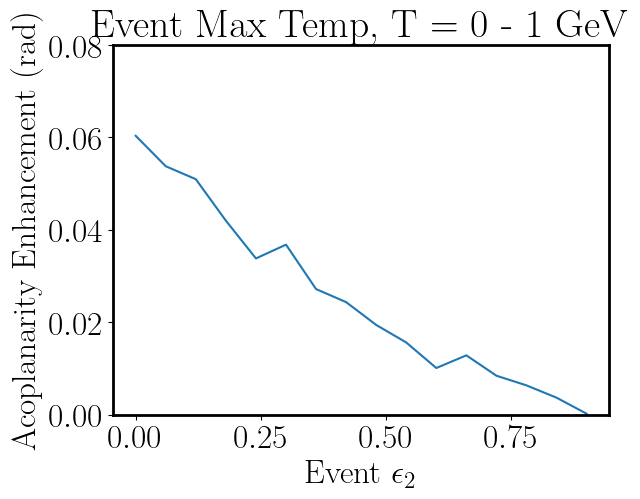

In [100]:
#Aco = func(e_2)

# e2_cut = (results['e2'] < e_max) & (results['e2'] > e_min) & (results['K_F_DRIFT'] == 0.75)
T_cut = (results['Tmax_event'] > 0) & (results['Tmax_event'] < 1) & (results['K_F_DRIFT'] == 0.75)
bin_width = 0.06
values5 = np.array([])
e2_bins = np.arange(0, 1, bin_width)

for e2 in e2_bins:
    e2_cut = (results['e2'] < e2 + bin_width/2) & (results['e2'] > e2 - bin_width/2)
    T_cut = (results['Tmax_event'] < T + bin_width/2) & (results['Tmax_event'] > T - bin_width/2)
    # print("begin")
    try:
        val = np.average(results[e2_cut & T_cut]['aco'], weights=results[e2_cut & T_cut]['weight'])
    except:
        val = np.nan
    
    # val = np.mean(results[e2_cut & T_cut]['aco'])
    values5 = np.append(values5, val)


fig, axis = plt.subplots(1)
axis.plot(e2_bins, values5)

plt.ylim(0,0.08)
axis.set_title('Event Max Temp, T = 0 - 1 GeV')
axis.set_xlabel(r'Event $\epsilon_2$')
axis.set_ylabel('Acoplanarity Enhancement (rad)')

print(e2_bins, values5)
print(np.shape(e2_bins))
print(np.shape(values5))

Text(0, 0.5, 'Acoplanarity Enhancement (rad)')

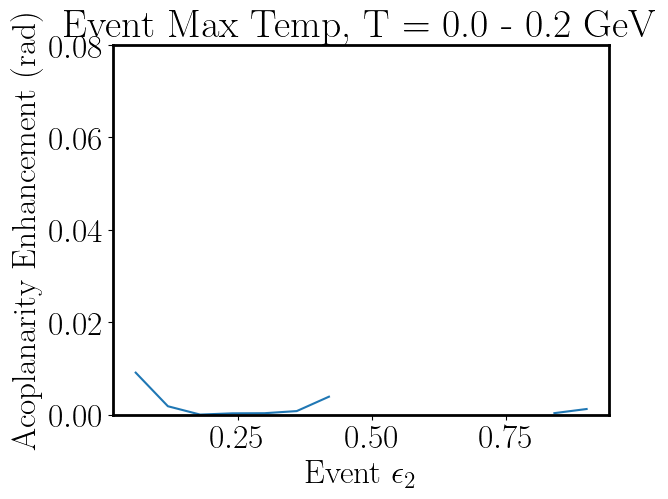

In [179]:
t_min = 0.0 #GeV
t_max = 0.2 #GeV
T_cut = (results['Tmax_event'] > t_min) & (results['Tmax_event'] < t_max) & (results['K_F_DRIFT'] == 0.75)
bin_width = 0.06

values6 = np.array([])
e2_bins = np.arange(0, 1, bin_width)
for e2 in e2_bins:
    e2_cut = (results['e2'] < e2 + bin_width/2) & (results['e2'] > e2 - bin_width/2)
    try:
        val = np.average(results[e2_cut & T_cut]['aco'], weights=results[e2_cut & T_cut]['weight'])
    except:
        val = np.nan
    
    # val = np.mean(results[e2_cut & T_cut]['aco'])
    values6 = np.append(values6, val)

fig, axis = plt.subplots(1)
axis.plot(e2_bins, values6)

plt.ylim(0,0.08)
axis.set_title(r'Event Max Temp, T = {} - {} GeV'.format(t_min, t_max)) 
axis.set_xlabel(r'Event $\epsilon_2$')
axis.set_ylabel('Acoplanarity Enhancement (rad)')

Text(0, 0.5, 'Acoplanarity Enhancement (rad)')

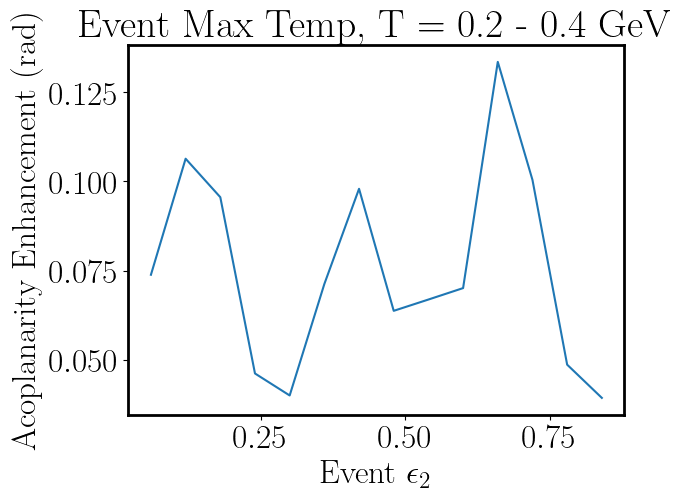

In [181]:
t_min = 0.2 #GeV
t_max = 0.4 #GeV
T_cut = (results['Tmax_event'] > t_min) & (results['Tmax_event'] < t_max) & (results['K_F_DRIFT'] == 0.75)
bin_width = 0.06

values7 = np.array([])
e2_bins = np.arange(0, 1, bin_width)
for e2 in e2_bins:
    e2_cut = (results['e2'] < e2 + bin_width/2) & (results['e2'] > e2 - bin_width/2)
    try:
        val = np.average(results[e2_cut & T_cut]['aco'], weights=results[e2_cut & T_cut]['weight'])
    except:
        val = np.nan
    # val = np.mean(results[e2_cut & T_cut]['aco'])
    values7 = np.append(values7, val)


fig, axis = plt.subplots(1)
axis.plot(e2_bins, values7)

# plt.ylim(0,0.08)
axis.set_title(r'Event Max Temp, T = {} - {} GeV'.format(t_min, t_max)) 
axis.set_xlabel(r'Event $\epsilon_2$')
axis.set_ylabel('Acoplanarity Enhancement (rad)')

[0.   0.06 0.12 0.18 0.24 0.3  0.36 0.42 0.48 0.54 0.6  0.66 0.72 0.78
 0.84 0.9  0.96] [0.31087834 0.47637486 0.5006037  0.42440561 0.36238854 0.36680365
 0.34070886 0.31868865 0.29350154 0.28239871 0.21028419 0.22296477
 0.17066001 0.39528385        nan        nan        nan]
(17,)
(17,)


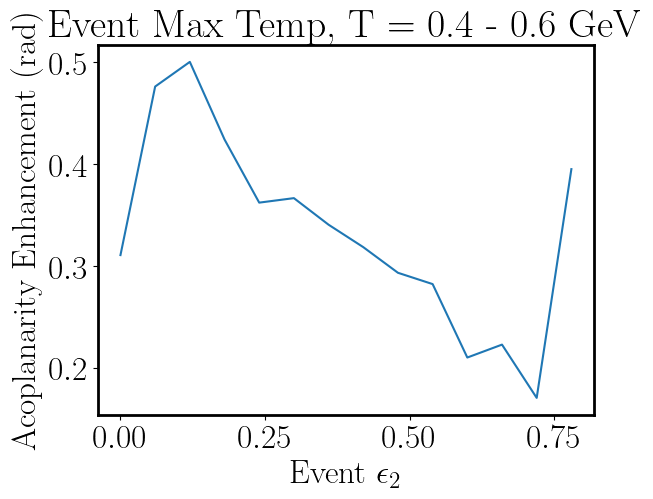

In [182]:
t_min = 0.4 #GeV
t_max = 0.6 #GeV
T_cut = (results['Tmax_event'] > t_min) & (results['Tmax_event'] < t_max) & (results['K_F_DRIFT'] == 0.75)
bin_width = 0.06

values8 = np.array([])
e2_bins = np.arange(0, 1, bin_width)
for e2 in e2_bins:
    e2_cut = (results['e2'] < e2 + bin_width/2) & (results['e2'] > e2 - bin_width/2)
    try:
        val = np.average(results[e2_cut & T_cut]['aco'], weights=results[e2_cut & T_cut]['weight'])
    except:
        val = np.nan
    
    # val = np.mean(results[e2_cut & T_cut]['aco'])
    values8 = np.append(values8, val)


fig, axis = plt.subplots(1)
axis.plot(e2_bins, values8)

# plt.ylim(0,0.08)
axis.set_title(r'Event Max Temp, T = {} - {} GeV'.format(t_min, t_max)) 
axis.set_xlabel(r'Event $\epsilon_2$')
axis.set_ylabel('Acoplanarity Enhancement (rad)')

print(e2_bins, values8)
print(np.shape(e2_bins))
print(np.shape(values8))

Text(0, 0.5, 'Acoplanarity Enhancement (rad)')

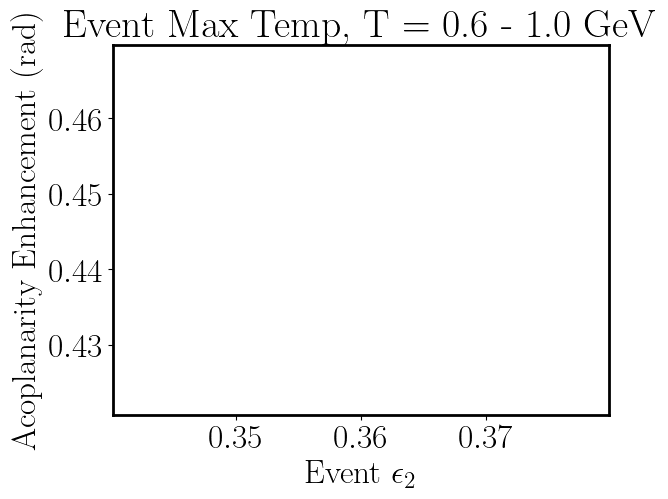

In [183]:
t_min = 0.6 #GeV
t_max = 1.0 #GeV
T_cut = (results['Tmax_event'] > t_min) & (results['Tmax_event'] < t_max) & (results['K_F_DRIFT'] == 0.75)
bin_width = 0.06

values9 = np.array([])
e2_bins = np.arange(0, 1, bin_width)
for e2 in e2_bins:
    e2_cut = (results['e2'] < e2 + bin_width/2) & (results['e2'] > e2 - bin_width/2)
    try:
        val = np.average(results[e2_cut & T_cut]['aco'], weights=results[e2_cut & T_cut]['weight'])
    except:
        val = np.nan
    
    # val = np.mean(results[e2_cut & T_cut]['aco'])
    values9 = np.append(values9, val)


fig, axis = plt.subplots(1)
axis.plot(e2_bins, values9)

# plt.ylim(0,0.08)
axis.set_title(r'Event Max Temp, T = {} - {} GeV'.format(t_min, t_max)) 
axis.set_xlabel(r'Event $\epsilon_2$')
axis.set_ylabel('Acoplanarity Enhancement (rad)')

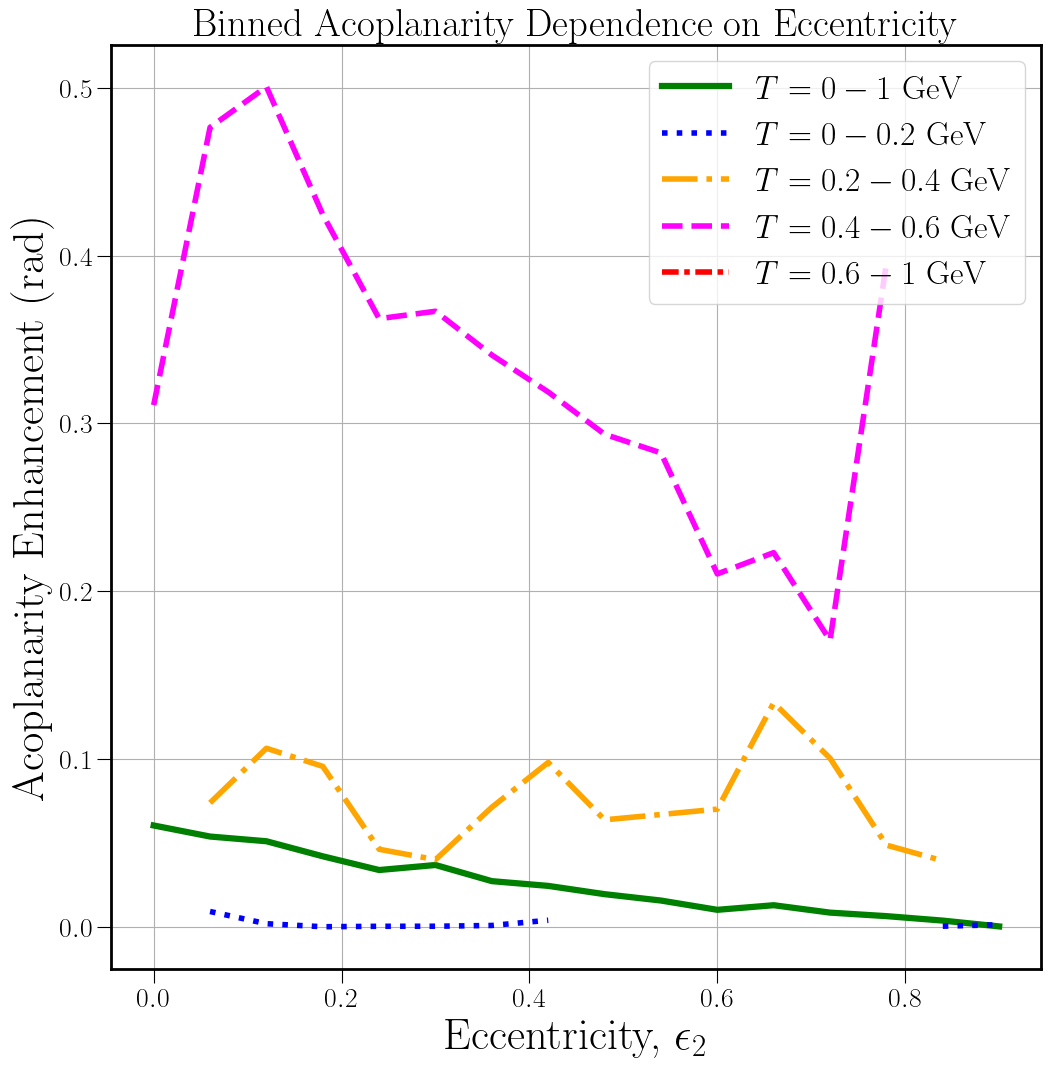

In [186]:
#Acoplanarity = func(e2) Plot


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

# #TeX up labels and text:

# plt.rc("text", usetex=True)
# plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
# plt.rc('font', size=24) 
# plt.rc('font', family='serif')

# #     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
# plt.rcParams["font.weight"] = "bold"     
# #     plt.rcParams["axes.labelweight"] = "bold"
# plt.rc('axes', linewidth=2)



ax.set_title(r'Binned Acoplanarity Dependence on Eccentricity', fontsize= 28)
ax.set_xlabel('Eccentricity, $\epsilon_2$', fontsize= 32)
ax.set_ylabel('Acoplanarity Enhancement (rad)', fontsize= 32)

ax.plot(e2_bins, values5, linewidth = 4.5, color='g', label="$T = 0 - 1$ GeV") #
ax.plot(e2_bins, values6, linewidth = 4, color='b', ls= 'dotted', label="$T = 0 - 0.2$ GeV") #
ax.plot(e2_bins, values7, linewidth = 4, color='orange', ls= 'dashdot', label="$T = 0.2 - 0.4$ GeV") #
ax.plot(e2_bins, values8, linewidth = 4, color='magenta', ls= 'dashed', label="$T = 0.4 - 0.6$ GeV") #
ax.plot(e2_bins, values9, linewidth = 4, color='r', ls= (0,(3,1,1,1)), label="$T = 0.6 - 1$ GeV") #

ax.tick_params(axis='both',which='major',labelsize=20,length=10)
# plt.ylim(0,0.08)
ax.grid()
ax.legend(fontsize=24)
plt.savefig("aco_enh_weighted_funcecc2_Tmax_all_kdrift0.75.png", bbox_inches="tight")
# ax.set_xlim(0,500)
# print(T_bins, values)

C:\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


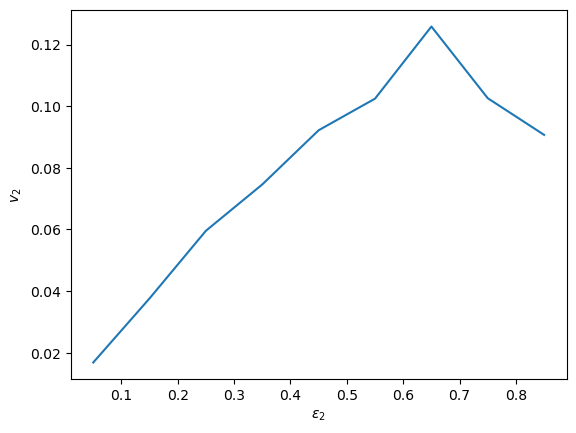

In [117]:
fig, axis = plt.subplots()
axis.set_ylabel(r'$v_2$') #, linewidth=4
axis.set_xlabel(r'$\epsilon_2$') #, rotation=0)
v2_array = np.array([])
e2_bins = np.arange(0, 1.1, 0.1)
e2_bin_centers = (e2_bins[1:] + e2_bins[0:-1])/2
for i in np.arange(0, len(e2_bin_centers)):
    e2_min = e2_bins[i]
    e2_max = e2_bins[i+1]
    df = results[(results['e2'] > e2_min) & (results['e2'] < e2_max)]
    v2 = np.mean(df['v2'].to_numpy())
    v2_array = np.append(v2_array, v2)

axis.plot(e2_bin_centers, v2_array)#, marker='+')
#axis.set_xlim(0.1, 0.65)

#np.savez('mean_energy_loss/g2.5_quarks_EL_deltaE_o_E.npz', pt=pt_bin_centers, el=avg_array)

#axis.legend()

Text(0, 0.5, 'Acoplanarity Enhancement (rad)')

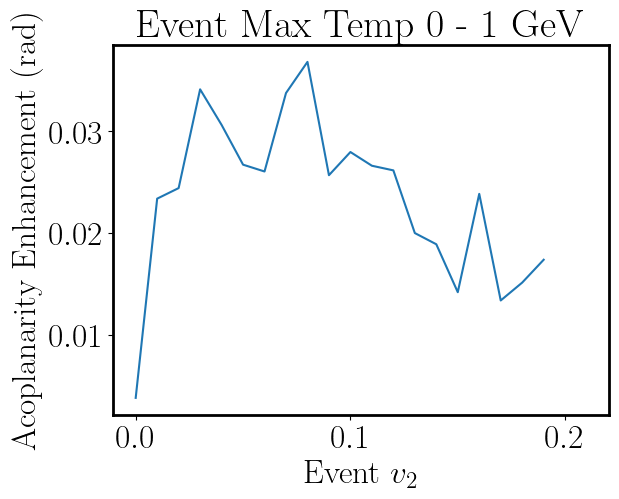

In [114]:

T_cut = (results['Tmax_event'] > 0) & (results['Tmax_event'] < 1) & (results['K_F_DRIFT'] == 0.75)
bin_width = 0.01

values = np.array([])
e2_bins = np.arange(0, 1, bin_width)
for e2 in e2_bins:
    e2_cut = (results['v2'] < e2 + bin_width/2) & (results['v2'] > e2 - bin_width/2)
    val = np.mean(results[e2_cut & T_cut]['aco'])
    values = np.append(values, val)


fig, axis = plt.subplots(1)
axis.plot(e2_bins, values)
axis.set_title('Event Max Temp 0 - 1 GeV')
axis.set_xlabel(r'Event $v_2$')
axis.set_ylabel('Acoplanarity Enhancement (rad)')

Text(0, 0.5, 'Acoplanarity Enhancement (rad)')

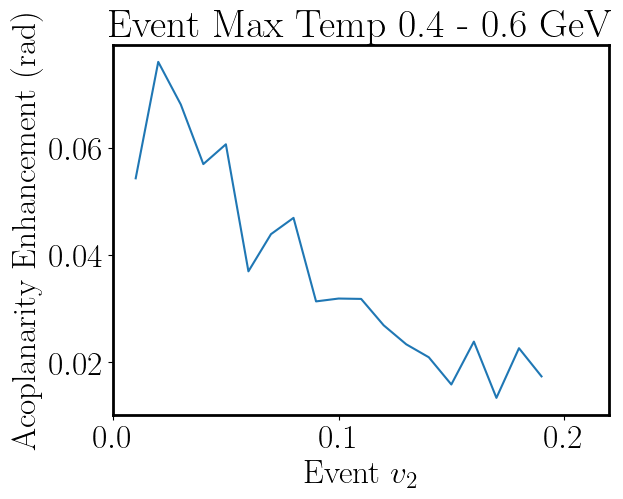

In [115]:

T_cut = (results['Tmax_event'] > 0.4) & (results['Tmax_event'] < 0.6)
bin_width = 0.01

values = np.array([])
e2_bins = np.arange(0, 1, bin_width)
for e2 in e2_bins:
    e2_cut = (results['v2'] < e2 + bin_width/2) & (results['v2'] > e2 - bin_width/2)
    val = np.mean(results[e2_cut & T_cut]['aco'])
    values = np.append(values, val)

fig, axis = plt.subplots(1)
axis.plot(e2_bins, values)
axis.set_title('Event Max Temp 0.4 - 0.6 GeV')
axis.set_xlabel(r'Event $v_2$')
axis.set_ylabel('Acoplanarity Enhancement (rad)')

# v_2

In [187]:
v2_result = pd.read_parquet('2024.08.03_acoplanarities\\partonic_hard_v2_dist.parquet')

In [188]:
v2_result

,delta_v_2_hard,v_2_hard,v_2_hard_el,mult,Tmax,e_2,v_2_soft
index,,,,,,,
0,0.000401,0.009681,0.009280,0.422367,0.169434,0.197283,0.034173
1,-0.165775,-0.105329,0.060446,3612.519489,0.567813,0.054870,0.010224
2,0.120505,0.128056,0.007551,1196.372821,0.515834,0.448477,0.129014
3,0.028350,0.030475,0.002125,35.429145,0.327165,0.402214,0.054994
4,0.101077,0.112675,0.011598,79.053864,0.374367,0.439969,0.075464
...,...,...,...,...,...,...,...
495,0.115586,0.129777,0.014191,179.216861,0.398569,0.711851,0.164501
496,0.110289,0.125470,0.015182,2853.116584,0.580300,0.149692,0.041247
497,0.113486,0.114722,0.001236,719.886179,0.494847,0.448559,0.108089
